In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("/Users\lahari\Downloads\car data.csv")
df.head()   #Printing first five rows 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
len(df["Car_Name"].unique())

98

In [4]:
df.shape

(301, 9)

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df.drop("Car_Name",axis=1,inplace=True)

In [7]:
df.isnull().values.any()

False

In [8]:
df.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [9]:
list1=[]  #storing all the features having categorical datatype
for i in df.columns :
    if (df[i].dtype =="object"):
         list1.append(i)
print(list1)

['Fuel_Type', 'Seller_Type', 'Transmission']


In [10]:
cat_df=df[list1]
cat_df.head()

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual


In [11]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
df["Current_Year"]=2020

In [25]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,2020


In [26]:
df["Number_of_years"]=df["Current_Year"]-df["Year"]

In [27]:
df = df.drop(["Current_Year","Year"],axis=1)

In [28]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [29]:
df.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,4.661296,7.628472,36947.205980,0.043189,6.372093
std,5.082812,8.644115,38886.883882,0.247915,2.891554
min,0.100000,0.320000,500.000000,0.000000,2.000000
25%,0.900000,1.200000,15000.000000,0.000000,4.000000
50%,3.600000,6.400000,32000.000000,0.000000,6.000000
75%,6.000000,9.900000,48767.000000,0.000000,8.000000
max,35.000000,92.600000,500000.000000,3.000000,17.000000


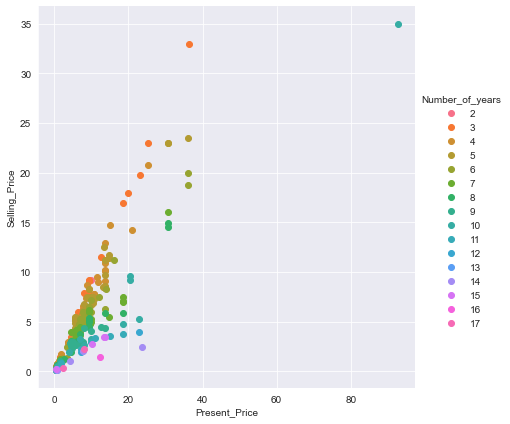

In [31]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="Number_of_years",height=6).map(plt.scatter,"Present_Price","Selling_Price").add_legend()
plt.show()

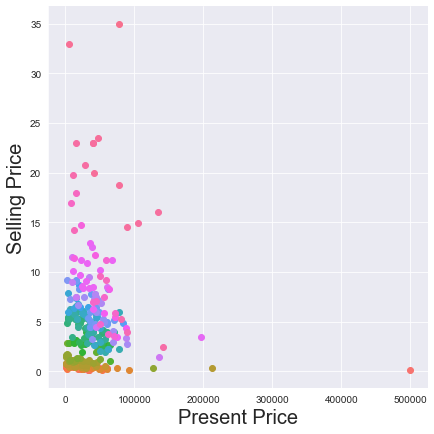

In [32]:
sns.set_style("darkgrid")
sns.FacetGrid(df,hue="Present_Price",height=6).map(plt.scatter,"Kms_Driven","Selling_Price")
plt.xlabel("Present Price",fontsize=20)
plt.ylabel("Selling Price",fontsize=20)
plt.show()

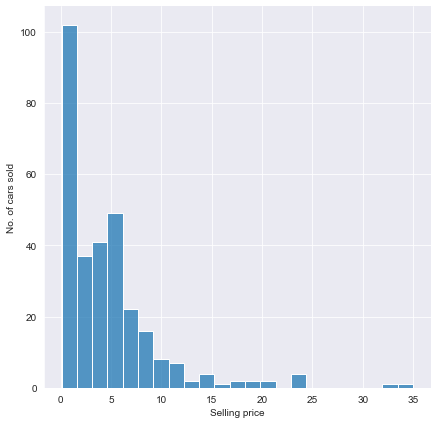

In [33]:
sns.set_style("darkgrid")
sns.FacetGrid(df,height=6).map(sns.histplot,"Selling_Price")
plt.xlabel("Selling price")
plt.ylabel("No. of cars sold")
plt.show()

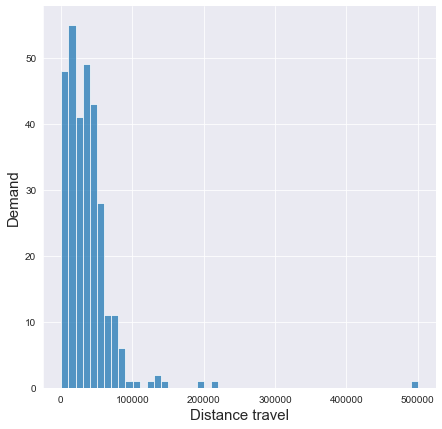

In [34]:
sns.set_style("darkgrid")
sns.FacetGrid(df,height=6).map(sns.histplot,"Kms_Driven")
plt.xlabel("Distance travel", fontsize = 15)
plt.ylabel("Demand", fontsize = 15)
plt.show()

[0.14279051 0.08662624 0.03236585 0.00856743 0.00571162 0.00475968
 0.00380775 0.         0.         0.00190387]
[ 0.1   3.59  7.08 10.57 14.06 17.55 21.04 24.53 28.02 31.51 35.  ]


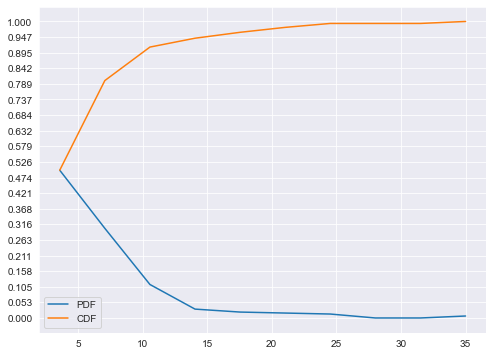

In [35]:
df_Selling_Price=df.loc[:,"Selling_Price"]
count,bin_edges=np.histogram(df_Selling_Price,bins=10,density=True)  #density=True gives normalized form od bin_edges and count
print(count)
print(bin_edges)
PDF=count/sum(count)
CDF=np.cumsum(PDF)  #cdf is sum of all pdf values
plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.yticks(np.linspace(0,1,20))
plt.legend(loc="lower left")
plt.show()

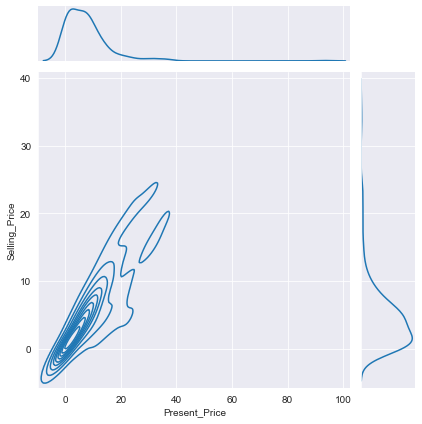

In [36]:
sns.set_style("darkgrid")
sns.jointplot(x ="Present_Price", y ="Selling_Price",data=df,kind="kde")
plt.show()

In [37]:
df=df.drop(list1,axis=1)

In [38]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years
0,3.35,5.59,27000,0,6
1,4.75,9.54,43000,0,7
2,7.25,9.85,6900,0,3
3,2.85,4.15,5200,0,9
4,4.60,6.87,42450,0,6


In [39]:
dict1={}
for index,col in enumerate(cat_df.columns):
    dict1[col]=cat_df[col].unique().tolist()
dict1   #key is feature and values will be cat variables

{'Fuel_Type': ['Petrol', 'Diesel', 'CNG'],
 'Seller_Type': ['Dealer', 'Individual'],
 'Transmission': ['Manual', 'Automatic']}

In [40]:
cat_df=pd.get_dummies(cat_df,drop_first=True)
cat_df.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1


In [41]:
df.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years
0,3.35,5.59,27000,0,6
1,4.75,9.54,43000,0,7
2,7.25,9.85,6900,0,3
3,2.85,4.15,5200,0,9
4,4.60,6.87,42450,0,6


In [42]:
df=pd.concat([df,cat_df],axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [43]:
df.T.drop_duplicates().T

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,0.0,6.0,0.0,1.0,0.0,1.0
1,4.75,9.54,43000.0,0.0,7.0,1.0,0.0,0.0,1.0
2,7.25,9.85,6900.0,0.0,3.0,0.0,1.0,0.0,1.0
3,2.85,4.15,5200.0,0.0,9.0,0.0,1.0,0.0,1.0
4,4.60,6.87,42450.0,0.0,6.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988.0,0.0,4.0,1.0,0.0,0.0,1.0
297,4.00,5.90,60000.0,0.0,5.0,0.0,1.0,0.0,1.0
298,3.35,11.00,87934.0,0.0,11.0,0.0,1.0,0.0,1.0
299,11.50,12.50,9000.0,0.0,3.0,1.0,0.0,0.0,1.0


In [44]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
print(X.shape)
print(Y.shape)

(301, 8)
(301,)


In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(240, 8)
(240,)
(61, 8)
(61,)


In [46]:
df.T.drop_duplicates().T

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000.0,0.0,6.0,0.0,1.0,0.0,1.0
1,4.75,9.54,43000.0,0.0,7.0,1.0,0.0,0.0,1.0
2,7.25,9.85,6900.0,0.0,3.0,0.0,1.0,0.0,1.0
3,2.85,4.15,5200.0,0.0,9.0,0.0,1.0,0.0,1.0
4,4.60,6.87,42450.0,0.0,6.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988.0,0.0,4.0,1.0,0.0,0.0,1.0
297,4.00,5.90,60000.0,0.0,5.0,0.0,1.0,0.0,1.0
298,3.35,11.00,87934.0,0.0,11.0,0.0,1.0,0.0,1.0
299,11.50,12.50,9000.0,0.0,3.0,1.0,0.0,0.0,1.0


In [47]:
print(df. columns)

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_of_years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')


In [48]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False])

In [49]:
df = df.loc[~df.index.duplicated(),:].copy()

In [50]:
df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_of_years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [51]:
df.dropna(inplace=True)

In [52]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import model_selection
models=[]
models.append(('CART', DecisionTreeRegressor()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("RF", RandomForestRegressor()))
models.append(("XGBOOST", XGBRegressor()))
names=[]
result=[]
for name,model in models:
    k_fold=model_selection.KFold(n_splits=10,shuffle=True,random_state=7)
    score=model_selection.cross_val_score(model,X_train,Y_train,cv=k_fold,scoring="r2")
    result.append(score)
    names.append(name)
    print(name,score.mean(),score.std())

CART 0.8576976179009455 0.13899056333651802
KNN -0.378568879077546 0.47647812753786817
RF 0.9054025972630872 0.11906531474636874
XGBOOST 0.9133089417590344 0.08345678456039288


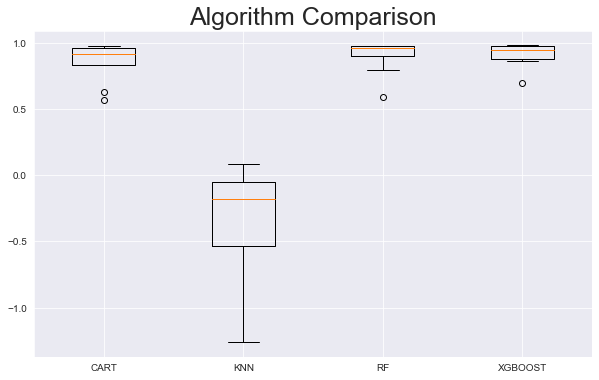

In [54]:
fig = plt.figure(figsize=(10,6))
plt.boxplot(result,labels = names)
plt.title("Algorithm Comparison",fontsize=25)
plt.show()

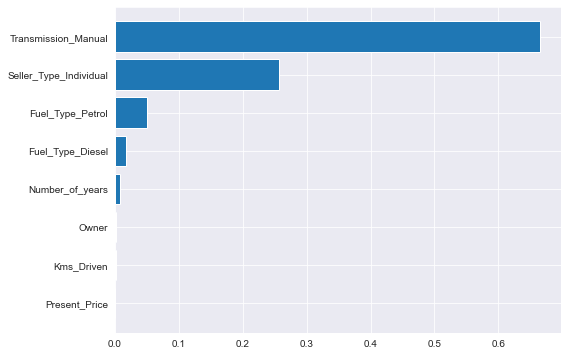

In [55]:
plt.figure(figsize=(8,6))
model = XGBRegressor()
model.fit(X,Y)
importance = np.sort(model.feature_importances_)
plt.barh(X.columns,importance)
plt.show()

In [ ]:
param_grid={"n_estimators":[100,120,140,150],
           "booster":["gbtree","gblinear","dart"]
           }
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor()
random_cv=RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,n_iter=100,cv=10)
random_cv.fit(X_train,Y_train)

In [58]:
random_cv.best_params_

{'n_estimators': 150, 'max_depth': 3, 'booster': 'dart'}

In [64]:
from sklearn.metrics import r2_score

In [67]:
xgb=XGBRegressor(n_estimators=150,max_depth=3,booster='dart')
xgb.fit(X_train,Y_train)
Y_train_predicted=xgb.predict(X_train)
Y_test_predicted=xgb.predict(X_test)
print("Train test accuracy :", r2_score(Y_train,Y_train_predicted))
print("Test set accuracy :", r2_score(Y_test,Y_test_predicted))

Train test accuracy : 0.9996018036997735
Test set accuracy : 0.9426240969022347


In [68]:
Result = pd.DataFrame({"Actual":Y_test,"Predicted":Y_test_predicted})
Result.head(10)

,Actual,Predicted
285,7.40,7.300674
248,4.00,3.283251
150,0.50,0.599769
217,3.15,3.283877
107,1.25,1.013085
206,5.75,5.109741
132,0.75,0.846470
73,2.65,2.790904
288,8.40,9.463024
157,0.48,0.607836
